In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import random
import copy

In [20]:
ind_num = 20 #一世代の個体数
gen_num = 8000 #目標の世代数
co_method_num = 0 #交叉の方法
selection_method_num = 0 #淘汰の方法
mutation_probability = 0.25 #突然変異の確率

In [6]:
class Individual:
  coordinate = 0
  point_num = 0

  def __init__(self, input=0):
    if input == 0:
      self.chromosome = list(range(Individual.point_num))
      random.shuffle(self.chromosome)
    else:
      self.chromosome = input
    self.getFitness()
    #print(self.chromosome)

  def setDefaultCoordinate(self, input):
    Individual.coordinate = copy.deepcopy(input)
  
  def setChromosome(self, input):
    self.chromosome = input

  def getFitness(self):
    self.fitness = 0
    self.temp = []
    for j in range(len(self.chromosome)):
      self.temp.append(Individual.coordinate[self.chromosome[j]])
    #print(self.temp)
    #print(self.coordinate)

    for i in range(len(self.temp)):
      a=self.temp[i]
      if i == len(self.temp)-1:
        b=self.temp[0]
      else:
        b=self.temp[i+1]
      distance=np.linalg.norm(b-a)
      self.fitness += distance
    #print(self.fitness)

  def getChromosomse(self):
    return_chromo = copy.deepcopy(self.chromosome)
    return return_chromo

In [7]:
class SelectionTest:
  def selection(self,input):
    #print("start sel")
    #print("before")
    #for i in range(len(input)):
      #print(input[i].fitness)
    #print("after")
    target_leng = int(len(input)/2)
    input.sort(key=lambda x: x.fitness)
    del input[target_leng:]
    #for i in range(len(input)):
      #print(input[i].fitness)

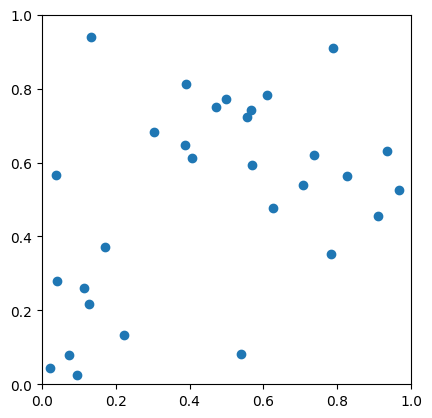

In [8]:
point_num = 30 #巡回するポイントの数
#point_list = list(range(point_num))
xPos = np.random.rand(point_num)#ポイントの数だけランダムな座標を生成
yPos = np.random.rand(point_num)
#print(xPos,"\n", yPos)

fig = plt.figure()
ax = fig.add_subplot()
plt.plot(xPos, yPos, marker = "o", linestyle = "none")#生成した座標の点のみ描画
ax.set_aspect('equal', adjustable='box')
plt.xlim(0, 1)
plt.ylim(0, 1)

coordinate = np.transpose(np.stack([xPos, yPos]))
#print(coordinate)
#print(coordinate[1])

In [9]:
class TestCO:
  def co(self,input):
    leng = len(input)
    for i in range(0, leng, 2):
      p1 = copy.deepcopy(input[i].chromosome)
      p2 = copy.deepcopy(input[i+1].chromosome)
      ret = self.cotst1201(p1,p2)

      input.append(Individual(ret[0]))
      input.append(Individual(ret[1]))



  def cotst1201(self,input1, input2):
    #print("start co")
    p1 = copy.deepcopy(input1)
    p2 = copy.deepcopy(input2)
    c1 = [-1] * len(p1)
    c2 = [-1] * len(p2)
    r = random.randrange(len(p1))
    #print(r)
    c1[r] = p1[r]
    c2[r] = p2[r]

    index1 = p1.index(p2[r])
    index2 = p2.index(p1[r])

    c1[index1] = p1[index1]
    c2[index2] = p2[index2]

    #print(c1)
    #print(c2)
      
    del1 = p1.pop(r)
    del2 = p2.pop(r)
    if not del1 == del2:
      p1.remove(del2)
      p2.remove(del1)

    #print(p1)
    #print(p2)
    cout1 = cout2 = 0
    for i in range(len(c1)):
    
      if c1[i] == -1:
        c1[i] = p2[cout1]
        cout1 += 1
      if c2[i] == -1:
        c2[i] = p1[cout2]
        cout2 += 1

    
    #print(c1)
    #print(c2)
    #print("end co")
    return [c1,c2]

In [10]:
def mutation_2(ind):
  new_chromo = copy.deepcopy(ind.chromosome)
  r1 = random.randint(0, len(ind.chromosome) -1)
  r2 = random.randint(0, len(ind.chromosome) -1)
  while r1 == r2:
    r2 = random.randint(0, len(ind.chromosome) -1)

  #print(r1,r2)
  temp = new_chromo[r1]
  new_chromo[r1] = new_chromo[r2]
  new_chromo[r2] = temp
  ind.setChromosome(new_chromo)
  
def mutation_ALL(ind):#壊れすぎてダメかも
  new_chromo = list(range(len(ind.chromosome)))
  random.shuffle(new_chromo)
  ind.setChromosome(new_chromo)


In [21]:
genelation=[]
plot_lst = list()
Individual.point_num = point_num
Individual.coordinate = copy.deepcopy(coordinate)
for i in range(ind_num):
  genelation.append(Individual())
#genelation[0].setDefaultCoordinate(coordinate)
#for i in range(ind_num):
# genelation[i].getFitness()

sel_test = SelectionTest()
co_test = TestCO()
cnt_m = 0
for i in range(gen_num):
  co_test.co(genelation)
  #for i in range(len(genelation)):
    #print(i,genelation[i].fitness)
  sel_test.selection(genelation)
  for j in range(ind_num):
    mut_rand = random.random()
    if mut_rand < mutation_probability:
      mutation_ALL(genelation[j])
      genelation[j].getFitness()
      cnt_m += 1
      #print("mutation", cnt_m)
  genelation.sort(key=lambda x: x.fitness)
  plot_lst.append([i,genelation[0].fitness])
  random.shuffle(genelation)
print("mutation",cnt_m)


mutation 39806


[12, 5, 7, 6, 27, 28, 11, 23, 2, 1, 21, 10, 0, 8, 26, 29, 19, 9, 25, 3, 20, 15, 22, 14, 4, 16, 24, 17, 18, 13]
[[0.78735032 0.90865339]
 [0.55594714 0.72322503]
 [0.49957093 0.77221076]
 [0.38809588 0.64655682]
 [0.62539284 0.47655987]
 [0.07444908 0.07950335]
 [0.04026274 0.279667  ]
 [0.11336161 0.2592538 ]
 [0.93539365 0.63161712]
 [0.53782375 0.08192976]
 [0.60958479 0.78335576]
 [0.39132127 0.81162845]
 [0.0222613  0.04380059]
 [0.09574528 0.02589683]
 [0.70756398 0.54045434]
 [0.73567244 0.62135467]
 [0.57027134 0.59249978]
 [0.12830284 0.21646423]
 [0.2226429  0.13254128]
 [0.78172058 0.35124134]
 [0.40726997 0.61293898]
 [0.56571588 0.74294274]
 [0.82689742 0.56417428]
 [0.47246235 0.74907461]
 [0.17197679 0.37119685]
 [0.30469167 0.68281905]
 [0.96788719 0.52515107]
 [0.03912577 0.5654406 ]
 [0.13364485 0.94071737]
 [0.90976456 0.45578132]]
[array([0.0222613 , 0.04380059]), array([0.07444908, 0.07950335]), array([0.11336161, 0.2592538 ]), array([0.04026274, 0.279667  ]), array

(0.0, 1.0)

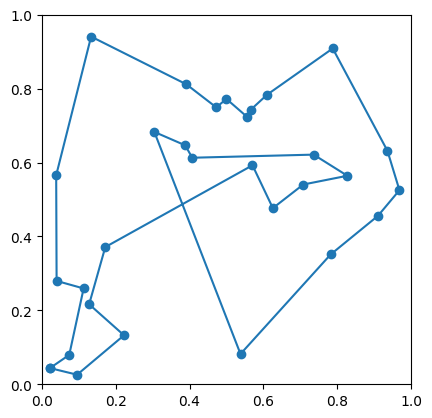

In [22]:
genelation.sort(key=lambda x: x.fitness)
print(genelation[0].chromosome)

ans = list()
for i in range(point_num):
  ans.append(coordinate[genelation[0].chromosome[i]])
ans.append(ans[0])

print(coordinate)
print(ans)


ans_tp = np.transpose(ans)
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(ans_tp[0],ans_tp[1],'-o')#グラフを描画
ax.set_aspect('equal', adjustable='box')
plt.xlim(0, 1)
plt.ylim(0, 1)

5.389065077011818


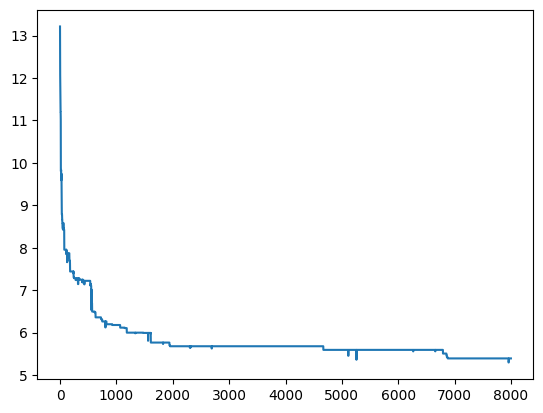

In [28]:
print(plot_lst[len(plot_lst)-1][1])
plot_lst_tp = np.transpose(plot_lst)
#print(plot_lst_tp)
plt.plot(plot_lst_tp[0], plot_lst_tp[1])



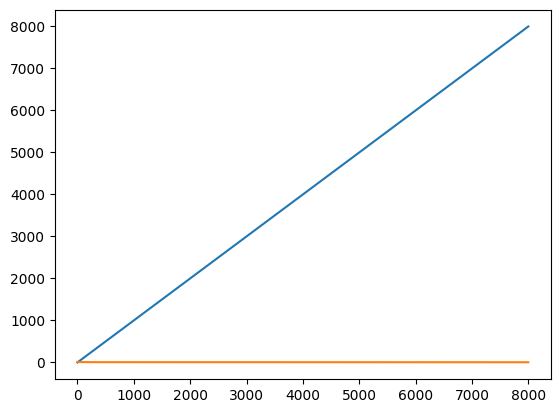

In [26]:
plt.plot(plot_lst)

In [15]:
#plot_listの長さだけfor
for n in range(len(plot_lst)):
    print(plot_lst[n][1])


13.290381663315825
13.132877823402302
13.018291489956429
13.018291489956429
13.018291489956429
12.946372595419538
12.127467788416567
12.127467788416567
12.127467788416567
11.743219266766047
11.743219266766047
11.743219266766047
11.743219266766047
11.743219266766047
11.823842408780884
11.644260652459241
11.22430738740321
10.576235857646205
10.486582742354946
10.807695836677794
10.807695836677794
10.627940336088876
10.627940336088876
10.627940336088876
10.627940336088876
10.627940336088876
10.710338982901725
10.710338982901725
10.728569620316065
10.731039562414995
10.731039562414995
10.731039562414995
10.710335254736666
10.710335254736666
10.607236028410547
10.607236028410547
10.279837146380666
9.957070554904938
9.957070554904938
9.957070554904938
9.957070554904938
9.957070554904938
9.957070554904938
9.957070554904938
9.957070554904938
9.957070554904938
9.991940130792429
9.984146670930363
9.984146670930363
9.984146670930363
9.812603222589466
9.79803021290315
9.79803021290315
9.9779403402